In [33]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import rc
import ipywidgets as ipw

from ipywidgets import interact, interactive
import ipywidgets as widgets

from IPython.display import HTML
rc('text', usetex=True)

%matplotlib widget

global_branche = 1
global_selected_k = 0 
global_omega = 0 
global_K1 = 0  
global_K2 = 0  

## Theoretical Background for Lattice Vibrations Simulation

The given script simulates the phonon dispersion relations and atomic vibrations in a one-dimensional diatomic chain, which is a simplified model to understand vibrational properties of crystalline materials. Below are the key concepts and parameters involved in the script:

### Phonon Dispersion Relations
The dispersion relations depict how phonon frequencies vary with wavevector $k$. For a diatomic chain, there are two branches of dispersion relations, namely acoustic and optical branches, arising from the different vibrational modes of the two atoms in the unit cell. The dispersion relations are derived from the dynamical matrix of the system and are given by:

$\ \omega_{\text{acoustic,optical}}(k) = G + K \pm \sqrt{(G+K)^2 - 4GK\sin^2(ka)} \$

where:
- $ \omega $ is the phonon frequency,
- $ k $ is the wavevector,
- $ G $ and $ K $ are the interatomic force constants,
- $ a $ is the lattice parameter.

### Atomic Vibrations
The vibrations of atoms are modeled as simple harmonic oscillations. The relative displacements of atoms from their equilibrium positions give rise to vibrations. The amplitude of vibration depends on the wavevector and the nature of the vibrational mode (acoustic or optical). The vibrational mode also determines the phase difference in vibrations between the two atoms in the unit cell. 

The displacement of atoms in the nth unit cell are given by:

$ u_n(t) = u_0 \exp(i(kna - \omega t)$
$ v_n(t) = v_0 \exp(i(kna - \omega t + \phi) $

where:
- $ u_n(t) $ and $ v_n(t) $ are the displacements of atoms in the nth unit cell,
- $ u_0 $ and $ v_0 $ are the maximum amplitudes of vibrations,
- $ \phi $ is the phase difference in vibrations between the two atoms,
- $ t $ is time.

The relative phase $ \phi $ and the amplitudes $ u_0 $ and $ v_0 $ are determined by the vibrational mode (acoustic or optical) and the force constants $ G $ and $ K $.

### Simulation
The script first plots the phonon dispersion relations, allowing the user to select a wavevector $k$ by clicking on the plot. The selected wavevector determines the frequency $ \omega $ and vibrational mode (acoustic or optical). The script then simulates the vibrations of atoms in a one-dimensional diatomic chain, displaying the time evolution of atomic positions in an animated plot.

### Parameters
- `G` and `K`: These are the force constants representing the strength of interactions between atoms.
- `a`: This is the lattice parameter representing the spacing between unit cells.
- `d`: This is the distance between atoms within a unit cell.
- `N`: This is the number of unit cells in the chain.

The script provides interactive widgets to vary the force constants `G` and `K`, and visualizes the resulting changes in phonon dispersion relations and atomic vibrations.

### Visualization
The script provides two visualizations:
1. Phonon dispersion relations plot: Shows the acoustic and optical branches, allowing the user to select a wavevector by clicking on the plot.
2. Atomic vibrations plot: Displays the time evolution of atomic positions in the diatomic chain, with the vibrations corresponding to the selected wavevector and vibrational mode.


In [34]:

def get_closest_point(clic_x, clic_y):
    ax= plt.gca()  # get axis handle
    acoustic_data = ax.lines[1]
    optic_data = ax.lines[0]

    k_a = acoustic_data.get_xdata()
    k_o = optic_data.get_xdata()
    diff_k_a = np.abs(k_a-clic_x)
    diff_k_o = np.abs(k_o-clic_x)
    index_a = np.argmin(diff_k_a)
    index_o = np.argmin(diff_k_o)

    y_diff_a = np.abs(acoustic_data.get_ydata()[index_a]-clic_y)
    y_diff_o = np.abs(optic_data.get_ydata()[index_o]-clic_y)

    ac_is_closer = y_diff_a < y_diff_o
    global global_branche
    global global_selected_k
    global global_omega
    
    if(ac_is_closer):
        global_branche=1
        global_selected_k = acoustic_data.get_xdata()[index_a]
        global_omega = acoustic_data.get_ydata()[index_a]
        return [acoustic_data.get_xdata()[index_a], acoustic_data.get_ydata()[index_a]]
    else:
        global_branche=2
        global_selected_k = optic_data.get_xdata()[index_a]
        global_omega = optic_data.get_ydata()[index_a]
        return [optic_data.get_xdata()[index_a], optic_data.get_ydata()[index_a]]


In [35]:
def interactive_lattice_plot(G, K):
    global global_K1
    global global_K2
    global_K1 = G
    global_K2 = K
    
    k = np.linspace(-np.pi/2, np.pi/2, 100)
    omega_o = G + K - np.sqrt((G + K)**2 - 4*G*K*np.sin(k)**2)
    omega_a = G + K + np.sqrt((G + K)**2 - 4*G*K*np.sin(k)**2)
    
    ax1.clear()
    ax1.plot(k, np.sqrt(omega_a))
    ax1.plot(k, np.sqrt(omega_o))
    ax1.set_xlabel("k")
    ax1.set_ylabel("$\omega$")
    ax1.set_xticks(np.linspace(-np.pi/2, np.pi/2, 5))
    ax1.set_xticklabels(['$-\pi/a$', '', '0', '', '$\pi/a$'])
       
    def onclick(event):    
        for i in np.arange(3, len(ax1.lines) + 1):
            ax1.lines.pop()
        [x, y] = get_closest_point(event.xdata, event.ydata)
        ax1.plot(x, y, '.', color='red')
    
    cid = plt.gcf().canvas.mpl_connect('button_press_event', onclick)

interactive(children=(FloatSlider(value=6.0, description='G', max=6.0, min=1.0, step=0.05), FloatSlider(value=…

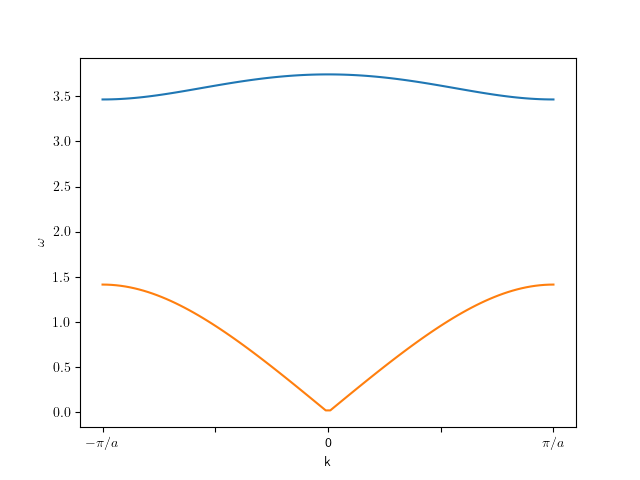

In [36]:
g = ipw.FloatSlider(min=1, max=6, step=0.05, value=6);
k = ipw.FloatSlider(min=1, max=6, step=0.05, value=1);
fig=plt.figure()
ax1=plt.axes()
plt.ion()
interactive(interactive_lattice_plot, G=g, K=k)

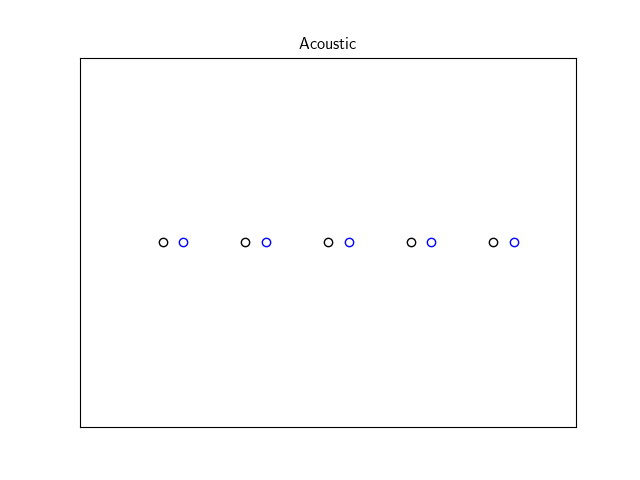

In [39]:
fig2 = plt.figure()
ax2 = plt.axes()
ax2.set_xlim([-2,10])
ax2.set_xticks([])
ax2.set_yticks([])
line_u, = ax2.plot([], [], "ok")
line_v, = ax2.plot([], [], "ob")
if global_branche == 1:
    ax2.title.set_text("Acoustic")
else : 
    ax2.title.set_text("Optic")

a = 2 # lattice parameter
d = 0.5 # distance between atoms 1 and 2 in basis 
N=5 # number of repeated basis
pos_u = np.arange(N)*a 
pos_v = np.arange(N)*a+d
ax2.plot(pos_u,np.zeros(N),"ok",mfc='none')
ax2.plot(pos_v,np.zeros(N),"ob",mfc='none')

# Initialization function: plot the background of each frame
def init():
    line_u.set_data([], [])
    line_v.set_data([], [])
    return line_u,

# Animation function which updates figure data.  This is called sequentially
def animate(iteration):
    global global_branche
    global global_selected_k
    global global_omega
    global global_K1
    global global_K2
    
    t=0.05*iteration
    a = 2 # lattice parameter
    d = 0.5 # distance between atoms 1 and 2 in basis 
    N=5 # number of repeated basis 
    relative_phase = (-1)** (1+global_branche) # relative phase between atom 1 and 2 in the basis

    a_nu = d/3.45*(relative_phase*(global_K1+global_K2*np.exp(1j*global_selected_k*a))/np.abs(global_K1+global_K2*np.exp(1j*global_selected_k*a)))
    b_nu = d/3.45 
    
    ns = np.arange(N)
    u_n = np.real(a_nu*np.exp(1j*global_selected_k*ns*a-1j*global_omega*t))
    v_n = np.real(b_nu*np.exp(1j*global_selected_k*ns*a-1j*global_omega*t))
    
    pos_u = np.arange(N)*a + u_n
    pos_v = np.arange(N)*a+d+v_n
    
    line_u.set_data(np.asarray([pos_u,np.zeros(N)]))
    line_v.set_data(np.asarray([pos_v,np.zeros(N)]))
    return line_u,

# Call the animator
anim = animation.FuncAnimation(fig2, animate, init_func=init, frames=300, interval=30, blit=True)



## Self-Study Questions

1. **Fundamental Concepts:**
   - Explain the concept of phonons and their significance in understanding the vibrational properties of crystalline materials.
   - Differentiate between acoustic and optical phonons. 
   - How are phonon dispersion relations derived?

2. **Exploration of the Script:**
   - Describe the role of the force constants `G` and `K` in the script. How do changes in these constants affect the phonon dispersion relations and atomic vibrations?
   - Explain the significance of the lattice parameter `a` and the distance `d` in the script.

3. **Mathematical Understanding:**
   - Derive the expressions for phonon frequencies $ \omega_{\text{acoustic,optical}}(k) $ for a one-dimensional diatomic chain.
   - Derive the expressions for atomic displacements $ u_n(t) $ and $ v_n(t) $ given in the theoretical background.

4. **Simulation Analysis:**
   - Explain the steps involved in the simulation of atomic vibrations in the script. 
   - Discuss how the script visualizes the phonon dispersion relations and atomic vibrations.
   
5. **Extension Questions:**
   - How would the simulation and results change for a three-dimensional diatomic lattice?
   - How would the inclusion of anharmonic interactions affect the phonon dispersion relations and atomic vibrations?
   - Propose a method to extend the script to simulate phonons in a monoatomic chain or a more complex crystalline structure.

6. **Real-world Applications:**
   - Discuss the real-world applications of understanding phonon dispersion relations and atomic vibrations.
   - How are phonon properties related to thermal conductivity in materials?
   
7. **Coding:**
   - Suggest improvements or additional features that could be incorporated into the script to enhance its functionality or user interactivity.
   - Explore how different programming or simulation tools could be used to study phonon properties in materials.

8. **Visualization:**
   - Explain the importance of visualization in understanding phonon properties.
   - Discuss other visualization techniques that could be employed to represent phonon dispersion relations and atomic vibrations.


